In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import json

In [2]:
with open('matches.json', 'r') as f:
    data = json.load(f)

In [3]:
matches = pd.DataFrame(data)
matches.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,league,radiant_team,dire_team,players,patch,region,all_word_counts,my_word_counts,comeback,stomp,replay_url,throw,loss
0,7029470994,63,0,"[{'time': -180, 'type': 'chatwheel', 'key': '6...",251,"{'647': 2, '5335': 1, '5445': 2, '5465': 1, '6...",23,2163,"[{'order': 1, 'pick': False, 'active_team': 2,...",2055,1,7,2,10,15089,1,5901386520,0,"[{'time': 8, 'type': 'CHAT_MESSAGE_FIRSTBLOOD'...","[{'is_pick': False, 'hero_id': 33, 'team': 1, ...",0,"[0, -736, -621, -574, -259, -457, -439, -281, ...",15,8255888,False,"[0, -252, -232, -300, -295, -592, -140, 41, -2...",None,1677112951,"[{'start': 952, 'end': 998, 'last_death': 983,...",2038,1536,21,464169211,753125,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8255888, 'name': 'BetBoom Team', '...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'match_id': 7029470994, 'player_slot': 0, 'a...",51,15,"{'hi': 1, 'gg': 4, 'ggw': 1}",{},0.0,12857.0,http://replay251.valve.net/570/7029470994_4641...,NaN,NaN
1,7033953817,63,0,"[{'time': -939, 'type': 'chatwheel', 'key': '1...",251,"{'647': 4, '4050': 4, '5597': 130, '6480': 3, ...",32,8599101,"[{'order': 1, 'pick': False, 'active_team': 3,...",2132,1,279,2,10,15089,1,5905382559,0,"[{'time': 280, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...",0,"[0, -54, -194, 216, -355, 142, 444, 586, 714, ...",10,8260983,False,"[0, -275, -252, 226, -95, 562, 1000, 1174, 876...",None,1677353600,"[{'start': 710, 'end': 752, 'last_death': 737,...",2038,1536,21,1268201598,754123,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8260983, 'name': 'TSM', 'tag': 'TS...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","[{'match_id': 7033953817, 'player_slot': 0, 'a...",51,15,"{'glhf': 4, 'gg': 6}",{},714.0,36962.0,http://replay251.valve.net/570/7033953817_1268...,NaN,NaN
2,7030709784,63,0,"[{'time': -100, 'type': 'chatwheel', 'key': '7...",251,"{'630': 132, '647': 129, '5239': 0, '6763': 12...",16,6209166,"[{'order': 1, 'pick': False, 'active_team': 3,...",1904,1,67,2,10,15089,1,5902489600,0,"[{'time': 64, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 86, 'team': 1, ...",0,"[0, 111, 488, 307, -231, -820, -855, -865, -29...",10,8255888,False,"[0, 36, 195, -77, -63, -327, -458, -246, 447, ...",None,1677180482,"[{'start': 1227, 'end': 1271, 'last_death': 12...",1974,1536,21,441156036,753358,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8255888, 'name': 'BetBoom Team', '...","{'team_id': 6209166, 'name': 'Team Aster', 'ta...","[{'match_id': 7030709784, 'player_slot': 0, 'a...",51,15,{'gg': 4},{},488.0,16129.0,http://replay251.valve.net/570/7030709784_4411...,NaN,NaN
3,7033674530,63,0,"[{'time': -82, 'type': 'chat', 'key': 'GLHF', ...",251,"{'647': 129, '4566': 2, '4842': 129, '4991': 1...",36,8255756,"[{'order': 1, 'pick': False, 'active_team': 3,...",2092,1,336,2,10,15089,1,5905135191,0,"[{'time': 261, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 32, 'team': 0, ...",0,"[0, 46, 219, 51, -10, 391, -335, -833, -1502, ...",14,8599101,False,"[0, 130, -136, -528, -236, 10, -1139, -1666, -...",None,1677342285,"[{'start': 1119, 'end': 1175, 'last_death': 11...",1972,1536,21,58706153,754038,1,"{'leagueid': 15089, 'ticket': None, 'banner': ...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 8255756, 'name': 'Evil Geniuses', ...","[{'match_id': 7033674530, 'player_slot': 0, 'a...",51,15,"{'glhf': 4, 'lag': 1, 'ready': 1, 'sry': 1, 'g...",{},391.0,17205.0,http://replay251.valv

In [4]:
matches.columns

Index(['match_id', 'barracks_status_dire', 'barracks_status_radiant', 'chat',
       'cluster', 'cosmetics', 'dire_score', 'dire_team_id', 'draft_timings',
       'duration', 'engine', 'first_blood_time', 'game_mode', 'human_players',
       'leagueid', 'lobby_type', 'match_seq_num', 'negative_votes',
       'objectives', 'picks_bans', 'positive_votes', 'radiant_gold_adv',
       'radiant_score', 'radiant_team_id', 'radiant_win', 'radiant_xp_adv',
       'skill', 'start_time', 'teamfights', 'tower_status_dire',
       'tower_status_radiant', 'version', 'replay_salt', 'series_id',
       'series_type', 'league', 'radiant_team', 'dire_team', 'players',
       'patch', 'region', 'all_word_counts', 'my_word_counts', 'comeback',
       'stomp', 'replay_url', 'throw', 'loss'],
      dtype='object')

In [5]:
features_to_drop = [
    # list features
    'cosmetics', 'draft_timings', 'teamfights', 'league',
    'all_word_counts', 'my_word_counts',
    # non-list features
    'barracks_status_radiant', 'barracks_status_dire', 'cluster',
    'radiant_team_id', 'dire_team_id', 'engine', 'first_blood_time',
    'game_mode', 'human_players', 'leagueid', 'lobby_type', 'match_seq_num',
    'negative_votes', 'positive_votes', 'skill', 'start_time', 
    'tower_status_dire', 'tower_status_radiant', 'version', 'replay_salt',
    'series_id', 'series_type', 'patch', 'region', 'throw', 'loss',
    'replay_url', 'comeback', 'stomp',
    # drop after further investigation
    'chat'
]

In [6]:
matches_reduced = matches.drop(features_to_drop, axis=1)
matches_reduced.head(10)

,match_id,dire_score,duration,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_win,radiant_xp_adv,radiant_team,dire_team,players
0,7029470994,23,2055,"[{'time': 8, 'type': 'CHAT_MESSAGE_FIRSTBLOOD'...","[{'is_pick': False, 'hero_id': 33, 'team': 1, ...","[0, -736, -621, -574, -259, -457, -439, -281, ...",15,False,"[0, -252, -232, -300, -295, -592, -140, 41, -2...","{'team_id': 8255888, 'name': 'BetBoom Team', '...","{'team_id': 2163, 'name': 'Team Liquid', 'tag'...","[{'match_id': 7029470994, 'player_slot': 0, 'a..."
1,7033953817,32,2132,"[{'time': 280, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...","[0, -54, -194, 216, -355, 142, 444, 586, 714, ...",10,False,"[0, -275, -252, 226, -95, 562, 1000, 1174, 876...","{'team_id': 8260983, 'name': 'TSM', 'tag': 'TS...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","[{'match_id': 7033953817, 'player_slot': 0, 'a..."
2,7030709784,16,1904,"[{'time': 64, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 86, 'team': 1, ...","[0, 111, 488, 307, -231, -820, -855, -865, -29...",10,False,"[0, 36, 195, -77, -63, -327, -458, -246, 447, ...","{'team_id': 8255888, 'name': 'BetBoom Team', '...","{'team_id': 6209166, 'name': 'Team Aster', 'ta...","[{'match_id': 7030709784, 'player_slot': 0, 'a..."
3,7033674530,36,2092,"[{'time': 261, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'is_pick': False, 'hero_id': 32, 'team': 0, ...","[0, 46, 219, 51, -10, 391, -335, -833, -1502, ...",14,False,"[0, 130, -136, -528, -236, 10, -1139, -1666, -...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 8255756, 'name': 'Evil Geniuses', ...","[{'match_id': 7033674530, 'player_slot': 0, 'a..."
4,7030830849,40,3094,"[{'time': 75, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 53, 'team': 0, ...","[0, -435, -913, -713, -790, -1561, -2051, -242...",15,False,"[0, 69, -557, -75, -160, -879, -1556, -2278, -...","{'team_id': 8260983, 'name': 'TSM', 'tag': 'TS...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","[{'match_id': 7030830849, 'player_slot': 0, 'a..."
5,7035279013,4,1178,"[{'time': 55, 'type': 'CHAT_MESSAGE_COURIER_LO...","[{'is_pick': False, 'hero_id': 136, 'team': 0,...","[0, 267, 651, 1204, 1258, 1821, 1697, 2694, 31...",26,True,"[0, -124, 195, 396, 148, 958, 1009, 1606, 1602...","{'team_id': 8597976, 'name': 'Talon', 'tag': '...","{'team_id': 4, 'name': 'EHOME', 'tag': 'EHOME'...","[{'match_id': 7035279013, 'player_slot': 0, 'a..."
6,7041201789,6,1588,"[{'time': 119, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 43, 'team': 0, ...","[0, 438, 928, 811, 1459, 1240, 1372, 1812, 191...",21,True,"[0, -24, 110, 138, 668, 371, 563, 1244, 1092, ...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 8605863, 'name': 'Entity', 'tag': ...","[{'match_id': 7041201789, 'player_slot': 0, 'a..."
7,7034041872,27,2227,"[{'time': 364, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'is_pick': False, 'hero_id': 33, 'team': 0, ...","[0, 122, -58, 70, -534, -599, -486, 688, 1417,...",9,False,"[0, 33, -77, 122, -20, 66, 87, 985, 1763, 969,...","{'team_id': 8599101, 'name': 'Gaimin Gladiator...","{'team_id': 8260983, 'name': 'TSM', 'tag': 'TS...","[{'match_id': 7034041872, 'player_slot': 0, 'a..."
8,7035622905,43,2356,"[{'time': 43, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'is_pick': False, 'hero_id': 33, 'team': 0, ...","[0, -743, -185, -406, -411, -679, -779, -311, ...",21,False,"[0, -323, 272, 202, 217, -71, -343, -206, 31, ...","{'team_id': 8254400, 'name': 'beastcoast', 'ta...","{'team_id': 39, 'name': 'Shopify Rebellion', '...","[{'match_id': 7035622905, 'player_slot': 0, 'a..."
9,7035278822,33,2748,"[{'time': 0, 'type': 'CHAT_MESSAGE_FIRSTBLOOD'...","[{'is_pick': False, 'hero_id': 97, 'team': 0, ...","[-100, -213, -655, -298, -228, -998, -496, -72...",21,False,"[-50, 52, -702, -469, -38, -995, -627, -1473, ...","{'team_id': 8254145, 'name': 'Execration', 'ta...","{'team_id': 7119388, 'name'

In [7]:
unique_obj_msg = set([x['type'] for y in matches['objectives'] for x in y])
unique_obj_msg

{'CHAT_MESSAGE_AEGIS',
 'CHAT_MESSAGE_AEGIS_STOLEN',
 'CHAT_MESSAGE_COURIER_LOST',
 'CHAT_MESSAGE_FIRSTBLOOD',
 'CHAT_MESSAGE_ROSHAN_KILL',
 'building_kill'}

In [8]:
rosh_timings = [(x['time'], True if x['team'] == 2 else False) for x in matches['objectives'][0] if 'roshan' in x['type'].lower()]
rosh_timings

[(1092, False), (1829, False)]

In [9]:
courier_kills = [(x['time'], x['team'], True if x['killer'] == -1 else False) for x in matches['objectives'][0] if 'courier' in x['type'].lower()]
courier_kills

[(228, 3, False), (778, 2, False), (1476, 2, False), (1478, 2, False)]

In [10]:
for i in range(len(matches)):
    aegis_lost = [x for x in matches['objectives'][i] if 'stolen' in x['type'].lower()]
    if len(aegis_lost) > 0:
        print(i, aegis_lost)
        break

13 [{'time': 2367, 'type': 'CHAT_MESSAGE_AEGIS_STOLEN', 'slot': 4, 'player_slot': 4}]


In [11]:
aegis_stolen = [True if x['player_slot'] < 128 else False for x in matches['objectives'][0] if 'stolen' in x['type'].lower()]
aegis_stolen

[]

In [12]:
building_kills = [(x['time'], x['key']) for x in matches['objectives'][0] if 'building' in x['type'].lower()]
building_kills

[(594, 'npc_dota_goodguys_tower1_bot'),
 (607, 'npc_dota_badguys_tower1_top'),
 (750, 'npc_dota_goodguys_tower1_mid'),
 (1175, 'npc_dota_goodguys_tower1_top'),
 (1330, 'npc_dota_goodguys_tower2_bot'),
 (1537, 'npc_dota_goodguys_tower2_top'),
 (1641, 'npc_dota_badguys_tower1_mid'),
 (1712, 'npc_dota_goodguys_tower2_mid'),
 (1725, 'npc_dota_goodguys_tower3_bot'),
 (1731, 'npc_dota_goodguys_range_rax_bot'),
 (1776, 'npc_dota_goodguys_melee_rax_bot'),
 (1791, 'npc_dota_goodguys_tower3_mid'),
 (1936, 'npc_dota_goodguys_tower3_top'),
 (1970, 'npc_dota_goodguys_melee_rax_top'),
 (1991, 'npc_dota_goodguys_range_rax_top'),
 (2022, 'npc_dota_goodguys_range_rax_mid'),
 (2047, 'npc_dota_goodguys_melee_rax_mid'),
 (2056, 'npc_dota_goodguys_fort')]

In [13]:
def extract_rosh_kills(objectives):
    rosh_kill_timings_radiant = [
        x['time']
        for x in objectives if 'roshan' in x['type'].lower() and x['team'] == 2
    ]
    rosh_kill_timings_dire = [
        x['time']
        for x in objectives if 'roshan' in x['type'].lower() and x['team'] == 3
    ]
    
    return rosh_kill_timings_radiant, rosh_kill_timings_dire

In [14]:
rosh_timings = matches['objectives'].apply(lambda x: extract_rosh_kills(x))
df_rosh_timings = pd.DataFrame(rosh_timings.to_list(), columns=['radiant_rosh_time', 'dire_rosh_time'])
df_rosh_timings

,radiant_rosh_time,dire_rosh_time
0,[],"[1092, 1829]"
1,[],"[1188, 1829]"
2,[1031],[1622]
3,[],"[1012, 1655]"
4,[1613],"[1075, 2301, 2829]"
...,...,...
188,[1127],[1788]
189,"[1147, 1849]",[2579]
190,[],"[943, 1592, 2141]"
191,[],"[2220, 2940, 3532]"


In [15]:
df_rosh_timings['radiant_rosh_time'].apply(len).sum()

206

In [16]:
df_rosh_timings['dire_rosh_time'].apply(len).sum()

236

In [17]:
def extract_courier_kills(objectives):
    courier_kills_radiant = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 3 and x['killer'] >= 0
        )
    ]
    courier_kills_dire = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 2 and x['killer'] >= 0
        )
    ]
    courier_kills_radiant_creeps = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 3 and x['killer'] < 0
        )
    ]
    courier_kills_dire_creeps = [
        x['time'] for x in objectives if (
            'courier' in x['type'].lower() and x['team'] == 2 and x['killer'] < 0
        )
    ]
    
    return courier_kills_radiant, courier_kills_radiant_creeps, courier_kills_dire, courier_kills_dire_creeps

In [18]:
courier_kills = matches['objectives'].apply(lambda x: extract_courier_kills(x))
df_courier_kills = pd.DataFrame(
    courier_kills.to_list(),
    columns=[
        'radiant_courier_kills', 'radiant_courier_kills_creeps',
        'dire_courier_kills', 'dire_courier_kills_creeps'
    ]
)
df_courier_kills

,radiant_courier_kills,radiant_courier_kills_creeps,dire_courier_kills,dire_courier_kills_creeps
0,[228],[],"[778, 1476, 1478]",[]
1,[],[],"[686, 1708]",[]
2,[],[],"[64, 197, 696]",[]
3,[],[],"[261, 1285]",[]
4,"[279, 1362, 1429, 1960, 2765]",[1854],"[75, 679]",[]
...,...,...,...,...
188,[],[],[75],[]
189,[],[],[509],[]
190,"[1066, 1222, 1231, 1241, 1257, 1619, 2006]",[615],[51],[]
191,[],[],"[52, 87, 1002]",[]


In [19]:
df_courier_kills['radiant_courier_kills'].apply(len).sum()

303

In [20]:
df_courier_kills['radiant_courier_kills_creeps'].apply(len).sum()

29

In [21]:
df_courier_kills['dire_courier_kills'].apply(len).sum()

384

In [22]:
df_courier_kills['dire_courier_kills_creeps'].apply(len).sum()

26

In [23]:
def extract_aegis_stolen(objectives):
    aegis_stolen_radiant = [
        x['time'] for x in objectives if (
            'stolen' in x['type'].lower() and x['player_slot'] < 128
        )
    ]
    aegis_stolen_dire = [
        x['time'] for x in objectives if (
            'stolen' in x['type'].lower() and x['player_slot'] >= 128
        )
    ]
    
    return aegis_stolen_radiant, aegis_stolen_dire

In [24]:
aegis_stolen = matches['objectives'].apply(lambda x: extract_aegis_stolen(x))
df_aegis_stolen = pd.DataFrame(
    aegis_stolen.to_list(),
    columns=['radiant_aegis_stolen', 'dire_aegis_stolen']
)
df_aegis_stolen

,radiant_aegis_stolen,dire_aegis_stolen
0,[],[]
1,[],[]
2,[],[]
3,[],[]
4,[],[]
...,...,...
188,[],[]
189,[],[]
190,[],[]
191,[],[]


In [25]:
df_aegis_stolen['radiant_aegis_stolen'].apply(len).sum()

6

In [26]:
df_aegis_stolen['dire_aegis_stolen'].apply(len).sum()

8

In [27]:
[(x['time'], x['key']) for x in matches['objectives'][0] if 'building' in x['type'].lower()]

[(594, 'npc_dota_goodguys_tower1_bot'),
 (607, 'npc_dota_badguys_tower1_top'),
 (750, 'npc_dota_goodguys_tower1_mid'),
 (1175, 'npc_dota_goodguys_tower1_top'),
 (1330, 'npc_dota_goodguys_tower2_bot'),
 (1537, 'npc_dota_goodguys_tower2_top'),
 (1641, 'npc_dota_badguys_tower1_mid'),
 (1712, 'npc_dota_goodguys_tower2_mid'),
 (1725, 'npc_dota_goodguys_tower3_bot'),
 (1731, 'npc_dota_goodguys_range_rax_bot'),
 (1776, 'npc_dota_goodguys_melee_rax_bot'),
 (1791, 'npc_dota_goodguys_tower3_mid'),
 (1936, 'npc_dota_goodguys_tower3_top'),
 (1970, 'npc_dota_goodguys_melee_rax_top'),
 (1991, 'npc_dota_goodguys_range_rax_top'),
 (2022, 'npc_dota_goodguys_range_rax_mid'),
 (2047, 'npc_dota_goodguys_melee_rax_mid'),
 (2056, 'npc_dota_goodguys_fort')]

In [28]:
all_building_types = list(set([x['key'] for y in matches['objectives'] for x in y if 'building' in x['type'].lower()]))
all_building_types.sort()
renamed_building_types = []
for idx, building_type in enumerate(all_building_types):
    new_building_name = building_type \
        .split('_', 2)[-1] \
        .replace('badguys', 'dire') \
        .replace('goodguys', 'radiant')
    if 'tower4' in new_building_name:
        renamed_building_types.append(new_building_name + '_first')
    else:
        renamed_building_types.append(new_building_name)
renamed_building_types.extend(['dire_tower4_second', 'radiant_tower4_second'])

renamed_building_types

['dire_fort',
 'dire_melee_rax_bot',
 'dire_melee_rax_mid',
 'dire_melee_rax_top',
 'dire_range_rax_bot',
 'dire_range_rax_mid',
 'dire_range_rax_top',
 'dire_tower1_bot',
 'dire_tower1_mid',
 'dire_tower1_top',
 'dire_tower2_bot',
 'dire_tower2_mid',
 'dire_tower2_top',
 'dire_tower3_bot',
 'dire_tower3_mid',
 'dire_tower3_top',
 'dire_tower4_first',
 'radiant_fort',
 'radiant_melee_rax_bot',
 'radiant_melee_rax_mid',
 'radiant_melee_rax_top',
 'radiant_range_rax_bot',
 'radiant_range_rax_mid',
 'radiant_range_rax_top',
 'radiant_tower1_bot',
 'radiant_tower1_mid',
 'radiant_tower1_top',
 'radiant_tower2_bot',
 'radiant_tower2_mid',
 'radiant_tower2_top',
 'radiant_tower3_bot',
 'radiant_tower3_mid',
 'radiant_tower3_top',
 'radiant_tower4_first',
 'dire_tower4_second',
 'radiant_tower4_second']

In [29]:
def extract_building_kills(objectives):
    # tier 4 towers are not seperated -> divide into first and second
    building_lists = [None for _ in  range(len(all_building_types) + 2)]
    for idx, building in enumerate(all_building_types):
        building_kill = [
            x['time'] for x in objectives if (
                'building' in x['type'].lower() and building == x['key']
            )
        ]
        if len(building_kill) == 0:
            continue
        if 'tower4' in building:
            building_lists[idx] = building_kill[0]
            if len(building_kill) == 2:
                if 'bad' in building:
                    building_lists[-2] = building_kill[1]
                else:
                    building_lists[-1] = building_kill[1]
        else:
            building_lists[idx] = building_kill[0]
        
    return building_lists

In [30]:
test = all_building_types + ['dir_sec', 'rad_sec']
list(zip(extract_building_kills(matches['objectives'].iloc[-1]), test))

[(2101, 'npc_dota_badguys_fort'),
 (None, 'npc_dota_badguys_melee_rax_bot'),
 (None, 'npc_dota_badguys_melee_rax_mid'),
 (None, 'npc_dota_badguys_melee_rax_top'),
 (None, 'npc_dota_badguys_range_rax_bot'),
 (None, 'npc_dota_badguys_range_rax_mid'),
 (None, 'npc_dota_badguys_range_rax_top'),
 (460, 'npc_dota_badguys_tower1_bot'),
 (663, 'npc_dota_badguys_tower1_mid'),
 (713, 'npc_dota_badguys_tower1_top'),
 (None, 'npc_dota_badguys_tower2_bot'),
 (2068, 'npc_dota_badguys_tower2_mid'),
 (1629, 'npc_dota_badguys_tower2_top'),
 (None, 'npc_dota_badguys_tower3_bot'),
 (None, 'npc_dota_badguys_tower3_mid'),
 (2099, 'npc_dota_badguys_tower3_top'),
 (None, 'npc_dota_badguys_tower4'),
 (None, 'npc_dota_goodguys_fort'),
 (None, 'npc_dota_goodguys_melee_rax_bot'),
 (None, 'npc_dota_goodguys_melee_rax_mid'),
 (None, 'npc_dota_goodguys_melee_rax_top'),
 (None, 'npc_dota_goodguys_range_rax_bot'),
 (None, 'npc_dota_goodguys_range_rax_mid'),
 (None, 'npc_dota_goodguys_range_rax_top'),
 (894, 'npc_dota

In [31]:

building_kills = matches['objectives'].apply(lambda x: extract_building_kills(x))
df_building_kills = pd.DataFrame(
    building_kills.to_list(),
    columns=renamed_building_types
)
df_building_kills

,dire_fort,dire_melee_rax_bot,dire_melee_rax_mid,dire_melee_rax_top,dire_range_rax_bot,dire_range_rax_mid,dire_range_rax_top,dire_tower1_bot,dire_tower1_mid,dire_tower1_top,dire_tower2_bot,dire_tower2_mid,dire_tower2_top,dire_tower3_bot,dire_tower3_mid,dire_tower3_top,dire_tower4_first,radiant_fort,radiant_melee_rax_bot,radiant_melee_rax_mid,radiant_melee_rax_top,radiant_range_rax_bot,radiant_range_rax_mid,radiant_range_rax_top,radiant_tower1_bot,radiant_tower1_mid,radiant_tower1_top,radiant_tower2_bot,radiant_tower2_mid,radiant_tower2_top,radiant_tower3_bot,radiant_tower3_mid,radiant_tower3_top,radiant_tower4_first,dire_tower4_second,radiant_tower4_second
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.0,607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2056.0,1776.0,2047.0,1970.0,1731.0,2022.0,1991.0,594.0,750.0,1175.0,1330.0,1712.0,1537.0,1725.0,1791.0,1936.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,764.0,815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2133.0,2100.0,2006.0,1762.0,2098.0,2004.0,1764.0,558.0,931.0,1227.0,1419.0,1778.0,1688.0,2089.0,1991.0,1753.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1569.0,667.0,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1905.0,1849.0,1878.0,1681.0,1854.0,1883.0,1685.0,653.0,1212.0,1094.0,1388.0,1844.0,1640.0,1829.0,1868.0,1671.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1495.0,1357.0,980.0,NaN,NaN,1759.0,NaN,NaN,NaN,NaN,2092.0,1918.0,1940.0,2079.0,1914.0,1943.0,2081.0,894.0,966.0,776.0,1765.0,1193.0,2028.0,1791.0,1933.0,2074.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432.0,1553.0,713.0,NaN,NaN,2019.0,NaN,NaN,NaN,NaN,3094.0,2394.0,1980.0,3064.0,2395.0,2275.0,NaN,718.0,810.0,1424.0,1855.0,1950.0,2476.0,2384.0,1967.0,3040.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962.0,1298.0,693.0,NaN,NaN,1566.0,NaN,NaN,NaN,NaN,2079.0,1964.0,1762.0,2074.0,1966.0,1927.0,NaN,692.0,789.0,935.0,1142.0,1683.0,1831.0,1957.0,1755.0,2038.0,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1373.0,703.0,571.0,1442.0,1327.0,1176.0,NaN,NaN,2622.0,NaN,3209.0,3043.0,3061.0,NaN,3033.0,3063.0,NaN,776.0,1574.0,2607.0,2616.0,2509.0,NaN,2968.0,2827.0,NaN,3104.0,NaN,3200.0
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1029.0,989.0,549.0,NaN,NaN,1296.0,NaN,NaN,NaN,NaN,2363.0,1143.0,2273.0,1555.0,1137.0,2278.0,1556.0,550.0,640.0,975.0,1103.0,1252.0,1006.0,1126.0,2241.0,1539.0,2305.0,NaN,2307.0
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3604.0,NaN,2993.0,3012.0,NaN,2995.0,3017.0,985.0,1449.0,2448.0,2347.0,2498.0,2960.0,NaN,2989.0,3005.0,NaN,NaN,NaN


In [32]:
df_building_kills['dire_tower1_mid'].describe()

count     171.000000
mean      990.584795
std       386.335373
min       409.000000
25%       721.500000
50%       914.000000
75%      1178.500000
max      2564.000000
Name: dire_tower1_mid, dtype: float64

In [33]:
df_building_kills['dire_tower1_mid'][df_building_kills['dire_tower1_mid'].notna()].describe()

count     171.000000
mean      990.584795
std       386.335373
min       409.000000
25%       721.500000
50%       914.000000
75%      1178.500000
max      2564.000000
Name: dire_tower1_mid, dtype: float64

In [34]:
def extract_first_blood(objectives):
    radiant_first_blood = [
        x['time'] for x in objectives if (
            'first' in x['type'].lower() and x['player_slot'] < 128
        )
    ]
    dire_first_blood = [
        x['time'] for x in objectives if (
            'first' in x['type'].lower() and x['player_slot'] >= 128
        )
    ]
    return (
        radiant_first_blood[0] if len(radiant_first_blood) else np.nan,
        dire_first_blood[0] if len(dire_first_blood) else np.nan
    )

In [35]:
first_blood = matches['objectives'].apply(extract_first_blood)
df_first_blood = pd.DataFrame(
    first_blood.to_list(),
    columns=['radiant_first_blood', 'dire_first_blood']
)
df_first_blood.head()

,radiant_first_blood,dire_first_blood
0,NaN,8.0
1,280.0,NaN
2,68.0,NaN
3,NaN,337.0
4,NaN,291.0


In [36]:
df_first_blood['radiant_first_blood'].describe()

count    101.000000
mean     135.871287
std      113.369808
min      -46.000000
25%       54.000000
50%      122.000000
75%      216.000000
max      373.000000
Name: radiant_first_blood, dtype: float64

In [37]:
df_first_blood['dire_first_blood'].describe()

count     84.000000
mean     173.130952
std      116.462288
min      -47.000000
25%       95.750000
50%      180.000000
75%      261.000000
max      445.000000
Name: dire_first_blood, dtype: float64

In [38]:
picks_radiant = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if x['is_pick'] and x['team'] == 0]
picks_dire = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if x['is_pick'] and x['team'] == 1]

In [39]:
picks_radiant

[43, 51, 123, 10, 23]

In [40]:
picks_dire

[83, 53, 9, 38, 74]

In [41]:
bans_radiant = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if not x['is_pick'] and x['team'] == 0]
bans_dire = [x['hero_id'] for x in matches_reduced['picks_bans'][0] if not x['is_pick'] and x['team'] == 1]

In [42]:
bans_radiant

[61, 25, 52, 32, 35, 22, 120]

In [43]:
bans_dire

[33, 86, 65, 89, 109, 29, 106]

In [44]:
def extract_picks_bans(picks_bans):
    radiant_picks = [x['hero_id'] for x in picks_bans if x['is_pick'] and x['team'] == 0]
    dire_picks = [x['hero_id'] for x in picks_bans if x['is_pick'] and x['team'] == 1]
    radiant_bans = [x['hero_id'] for x in picks_bans if not x['is_pick'] and x['team'] == 0]
    dire_bans = [x['hero_id'] for x in picks_bans if not x['is_pick'] and x['team'] == 1]
    
    return radiant_picks, dire_picks, radiant_bans, dire_bans

In [45]:
picks_bans = matches_reduced['picks_bans'].apply(extract_picks_bans)
df_picks_bans = pd.DataFrame(picks_bans.to_list(), columns=['radiant_picks', 'dire_picks', 'radiant_bans', 'dire_bans'])
df_picks_bans.head()

,radiant_picks,dire_picks,radiant_bans,dire_bans
0,"[43, 51, 123, 10, 23]","[83, 53, 9, 38, 74]","[61, 25, 52, 32, 35, 22, 120]","[33, 86, 65, 89, 109, 29, 106]"
1,"[85, 33, 120, 128, 6]","[86, 43, 83, 106, 114]","[53, 52, 58, 89, 4, 35, 46]","[61, 25, 65, 32, 19, 10, 93]"
2,"[123, 85, 11, 136, 29]","[110, 106, 97, 58, 95]","[61, 25, 53, 4, 33, 10, 109]","[86, 43, 65, 52, 70, 129, 15]"
3,"[91, 53, 100, 120, 95]","[52, 75, 136, 46, 137]","[32, 98, 65, 89, 109, 33, 4]","[25, 61, 51, 38, 13, 43, 93]"
4,"[91, 52, 4, 32, 55]","[85, 100, 86, 29, 114]","[53, 89, 46, 65, 22, 6, 10]","[61, 25, 136, 33, 77, 98, 43]"


In [46]:
test = np.array(df_picks_bans['radiant_picks'].to_list())
np.unique(test, return_counts=True)[0][64]

86

In [47]:
# useful features
useful_player_stats = [
    'match_id', 'ability_upgrades_arr', 'ability_uses',
    'actions', 'additional_units', 'assists',
    'buyback_log', 'camps_stacked', 'damage',
    'damage_inflictor', 'damage_inflictor_received', 'damage_taken',
    'damage_targets', 'deaths', 'denies', 'gold_per_min', 'gold_reasons',
    'gold_spent', 'gold_t', 'hero_damage', 'hero_healing', 'hero_hits',
    'hero_id', 'item_uses', 'kill_streaks', 'killed', 'killed_by', 'kills',
    'kills_log', 'lane_pos', 'last_hits', 'level', 'lh_t', 'life_state',
    'multi_kills', 'net_worth', 'obs_left_log', 'pings', 'purchase_log',
    'runes_log', 'sen_left_log', 'tower_damage', 'towers_killed', 'xp_per_min',
    'xp_reasons', 'xp_t', 'name', 'kda', 'neutral_kills',
    'courier_kills', 'lane_kills', 'observer_kills', 'sentry_kills',
    'roshan_kills', 'ancient_kills', 'buyback_count', 'observer_uses',
    'sentry_uses', 'lane_efficiency', 'lane', 'is_roaming', 'item_win',
    'actions_per_min', 'creeps_stacked', 'obs_log', 'sen_log'
]
useless_player_stats = [
    'player_slot', 'account_id', 'dn_t', 'firstblood_claimed', 'gold',
    'item_0', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5',
    'item_neutral', 'leaver_status', 'max_hero_hit', 'obs', 'obs_placed',
    'party_id', 'party_size', 'performance_others', 'permanent_buffs',
    'pred_vict', 'purchase', 'randomed', 'repicked', 'roshans_killed',
    'rune_pickups', 'runes', 'sen', 'sen_placed', 'stuns', 'teamfight_participation',
    'times', 'personaname', 'last_login', 'radiant_win', 'start_time', 'duration',
    'cluster', 'lobby_type', 'game_mode', 'is_contributor', 'patch', 'region',
    'isRadiant', 'win', 'lose', 'total_gold', 'total_xp', 'abandons',
    'necronomicon_kills', 'lane_efficiency_pct', 'lane_role', 'purchase_time',
    'item_usage', 'purchase_tpscroll', 'life_state_dead', 'rank_tier',
    'is_subscriber', 'cosmetics', 'benchmarks', 'connection_log',
    'first_purchase_time', 'ability_targets', 'backpack_0', 'backpack_1',
    'backpack_2', 'backpack_3', 'hero_kills', 'tower_kills'
]
len_useful = len(useful_player_stats)
len_useless = len(useless_player_stats)
print(f'{len_useful} + {len_useless} = {len_useful + len_useless}')
#for feature in sorted(useful_player_stats):
#    print(f"- {feature}:")

66 + 69 = 135


In [48]:
print(len(matches_reduced['players'][0][0].keys()))
list(matches_reduced['players'][0][0].keys())

136


['match_id',
 'player_slot',
 'ability_targets',
 'ability_upgrades_arr',
 'ability_uses',
 'account_id',
 'actions',
 'additional_units',
 'assists',
 'backpack_0',
 'backpack_1',
 'backpack_2',
 'backpack_3',
 'buyback_log',
 'camps_stacked',
 'connection_log',
 'creeps_stacked',
 'damage',
 'damage_inflictor',
 'damage_inflictor_received',
 'damage_taken',
 'damage_targets',
 'deaths',
 'denies',
 'dn_t',
 'firstblood_claimed',
 'gold',
 'gold_per_min',
 'gold_reasons',
 'gold_spent',
 'gold_t',
 'hero_damage',
 'hero_healing',
 'hero_hits',
 'hero_id',
 'item_0',
 'item_1',
 'item_2',
 'item_3',
 'item_4',
 'item_5',
 'item_neutral',
 'item_uses',
 'kill_streaks',
 'killed',
 'killed_by',
 'kills',
 'kills_log',
 'lane_pos',
 'last_hits',
 'leaver_status',
 'level',
 'lh_t',
 'life_state',
 'max_hero_hit',
 'multi_kills',
 'net_worth',
 'obs',
 'obs_left_log',
 'obs_log',
 'obs_placed',
 'party_id',
 'party_size',
 'performance_others',
 'permanent_buffs',
 'pings',
 'pred_vict',
 

In [49]:
test_var_name = 'xp_per_min'
for i in range(1):
    for j in range(10):
        test_var = matches_reduced['players'][i][j][test_var_name]
        dump = json.dumps(test_var, indent=4)
        print(dump)

488
632
665
362
242
342
577
613
534
853


# play around with movement heatmap

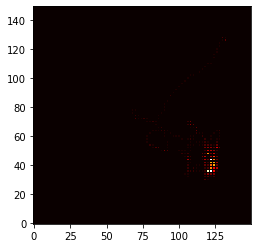

In [50]:
pos_mat = np.zeros(shape=(200, 200), dtype=np.float32)
lane_pos_test = matches_reduced['players'][0][6]['lane_pos']
for key in lane_pos_test.keys():
    for key2 in lane_pos_test[key]:
        col, row = int(key), int(key2)
        pos_mat[row, col] = float(lane_pos_test[key][key2])
#pos_mat[pos_mat == 0] = np.nan
plt.imshow(pos_mat[50:, 50:], origin='lower', interpolation='none', cmap='hot') 

/tmp/ipykernel_53498/3652358029.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map = plt.cm.get_cmap('Spectral')


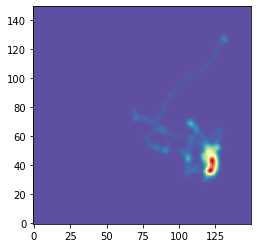

In [51]:
from scipy.ndimage import gaussian_filter
sigma = [1.5, 1.5]
pos_mat_smooth = gaussian_filter(pos_mat, sigma, mode='constant')
orig_map = plt.cm.get_cmap('Spectral')
reverse_map = orig_map.reversed()
plt.imshow(pos_mat_smooth[50:, 50:], origin='lower', cmap=reverse_map)

# start preprocessing for player features
only useful

In [65]:
useful_features_sorted = sorted(useful_player_stats)
for i in range(len(matches_reduced)):
    for j in range(10):
        #test_var = matches_reduced['players'][i][j][useful_features_sorted[0]]
        test_var = matches_reduced['players'][i][j]['pings']
        dump = json.dumps(test_var, indent=4)
        print(dump)

187
42
52
60
105
21
47
36
108
13
57
64
147
35
7
48
35
8
31
37
131
23
31
35
70
3
25
26
28
57
27
18
18
41
15
35
47
115
17
5
85
71
42
126
65
267
82
44
85
100
33
17
19
9
13
2
4
17
15
24
59
30
8
35
38
38
51
21
19
40
28
25
5
34
40
70
109
159
74
34
15
14
18
39
48
73
18
23
84
92
71
45
68
56
29
47
86
34
61
14
204
45
59
45
72
14
9
39
19
64
28
36
39
10
27
74
39
22
28
32
15
21
67
14
2
33
8
68
58
8
78
46
9
50
21
11
27
38
11
87
59
55
42
36
30
23
29
40
90
29
25
47
90
103
33
89
56
24
36
40
78
36
31
41
72
15
45
38
22
119
146
13
65
109
124
121
201
112
138
95
45
21
37
26
20
62
105
82
40
31
52
5
16
42
37
16
30
16
12
31
18
11
12
17
9
28
9
28
32
40
10
5
44
82
29
22
62
40
19
14
13
30
70
44
100
99
11
34
74
79
20
74
68
53
188
207
233
77
99
98
29
10
44
7
40
2
31
23
15
49
133
22
28
46
62
111
101
48
43
135
37
49
89
13
12
55
12
14
45
74
51
62
29
45
44
222
89
48
89
104
32
73
16
22
37
36
37
1
13
8
24
60
51
10
40
76
45
12
33
58
69
54
4
17
45
28
20
49
2
20
14
100
23
45
38
29
66
27
27
9
190
64
67
61
138
18
18
43
42
69


KeyError: 'pings'

In [66]:
# include all simple features
useful_features_simple = [
    'actions_per_min', 'ancient_kills', 'assists', 'buyback_count', 'camps_stacked',
    'courier_kills', 'creeps_stacked', 'deaths', 'denies', 'gold_per_min', 'gold_spent',
    'hero_damage', 'hero_healing', 'hero_id', 'is_roaming', 'kda', 'kills', 'lane',
    'lane_efficiency', 'lane_kills', 'last_hits', 'level', 'match_id', 'name', 'net_worth',
    'neutral_kills', 'observer_kills', 'observer_uses', 'pings', 'roshan_kills',
    'sentry_kills', 'sentry_uses', 'tower_damage', 'tower_kills', 'xp_per_min'
]

df_players = pd.DataFrame()
for match in matches_reduced['players']:
    match_series = pd.Series(match)
    match_df = pd.DataFrame(match_series.apply(lambda x: x['match_id']).to_list(), columns=['match_id'])
    for simple_feature in useful_features_simple:
        match_df[simple_feature] = match_series.apply(lambda x: x[simple_feature]
                                                     if simple_feature in x
                                                     else 0)
    
    df_players = pd.concat([df_players, match_df])
    
df_players.head(20)
#pd.Series(matches_reduced['players'][0]).apply(lambda x: x['match_id'])

,match_id,actions_per_min,ancient_kills,assists,buyback_count,camps_stacked,courier_kills,creeps_stacked,deaths,denies,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,is_roaming,kda,kills,lane,lane_efficiency,lane_kills,last_hits,level,name,net_worth,neutral_kills,observer_kills,observer_uses,pings,roshan_kills,sentry_kills,sentry_uses,tower_damage,tower_kills,xp_per_min
0,7029470994,335,5,4,1,0,1,0,3,8,447,13440,14745,6899,43,False,3,8,3,0.685327,146,200,17,Nightfall,13712,29,0,0,187,0,0,0,1381,1,488
1,7029470994,354,11,10,1,0,0,0,2,16,540,13915,13509,0,23,False,3,1,2,0.936338,196,329,20,gpk~,16287,87,1,2,42,0,2,0,0,0,632
2,7029470994,354,24,4,1,3,0,11,4,9,646,20895,13541,0,10,False,1,3,1,0.790622,223,405,20,Pure~,19112,144,0,0,52,0,1,1,2295,1,665
3,7029470994,250,0,8,0,2,0,6,4,3,229,8105,12053,0,123,False,2,2,3,0.274859,37,52,15,Save-,6836,7,2,4,60,0,0,3,183,0,362
4,7029470994,309,0,8,1,0,0,0,10,17,200,6355,10704,0,51,False,0,1,1,0.308610,21,38,12,TORONTOTOKYO,3050,0,3,2,105,0,5,9,0,0,242
5,7029470994,375,0,9,0,1,2,5,5,1,245,8020,9541,3903,83,False,1,0,3,0.306386,19,36,14,Insania,7056,10,1,2,21,0,2,13,0,0,342
6,7029470994,458,26,15,0,6,1,36,6,4,552,17345,18406,3645,38,False,2,3,1,0.823767,137,247,19,zai,17778,95,0,0,47,0,0,0,11144,4,577
7,7029470994,243,12,13,0,1,0,1,4,9,533,19370,16204,0,74,False,3,4,2,0.785570,152,212,19,Nisha,18705,51,0,2,36,0,1,0,7807,3,613
8,7029470994,196,0,8,0,0,0,0,0,0,366,11130,14219,0,9,False,13,5,1,0.531730,56,88,18,Boxi,11683,14,5,4,108,0,9,6,196,0,534
9,7029470994,362,22,8,0,3,0,6,0,13,819,28240,36205,0,53,False,19,11,3,0.838925,227,428,23,m1CKe,27852,186,0,0,13,2,0,0,9067,1,853


In [54]:
df_players.groupby(['name'])['kills'].mean().sort_values(ascending=False)

name
kiyotaka        9.800000
Yatoro雨         9.160000
Mikoto          9.033333
Bryle           8.937500
Wisper          8.807692
                  ...   
Fly             1.740741
Seleri          1.640000
TORONTOTOKYO    1.562500
XCJ             1.500000
jabbz           1.285714
Name: kills, Length: 91, dtype: float64

In [55]:
df_players.groupby(['name'])['deaths'].mean().sort_values(ascending=False)

name
Lww          8.750000
Salad        7.937500
Solo         7.850000
Sneyking     7.789474
XCJ          7.562500
               ...   
shiro        2.947368
Quinn        2.880000
Abed         2.592593
Monet        2.370370
医者watson`    2.227273
Name: deaths, Length: 91, dtype: float64

In [67]:
df_players[df_players['pings'] == 0][['name', 'match_id', 'pings']]

,name,match_id,pings
6,kiyotaka,7035465739,0
6,Sacred,7033875680,0
7,Flyby,7030590658,0
2,Flyby,7029426541,0
9,Pakazs,7029000258,0
2,Flyby,7033792525,0


In [72]:
df_players.groupby(['name'])['pings'].mean().sort_values(ascending=True)[:20]

name
Flyby         5.062500
jabbz         8.000000
Pakazs        8.461538
Night         9.687500
Monet        10.370370
AlaCrity-    11.625000
Sacred       11.857143
Abed         13.148148
Panda        13.500000
Collapse     14.280000
Ace ♠        14.800000
stingeR      15.142857
Lww          15.500000
shiro        16.736842
Wisper       18.846154
Bob          21.937500
kiyotaka     26.000000
Solo         26.900000
Insania      27.666667
K1 tqmD      28.285714
Name: pings, dtype: float64

In [73]:
df_players.describe()

,match_id,actions_per_min,ancient_kills,assists,buyback_count,camps_stacked,courier_kills,creeps_stacked,deaths,denies,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kda,kills,lane,lane_efficiency,lane_kills,last_hits,level,net_worth,neutral_kills,observer_kills,observer_uses,pings,roshan_kills,sentry_kills,sentry_uses,tower_damage,tower_kills,xp_per_min
count,1.930000e+03,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,7.034279e+09,290.758549,8.570466,11.590155,0.424352,1.711399,0.355959,5.106736,4.856995,8.714508,459.090674,16253.795337,18846.683420,1473.139896,66.962176,4.085492,4.786528,2.008290,0.595907,135.286528,217.564249,19.173057,16145.275130,66.392228,1.395855,1.694819,52.184974,0.229016,2.254922,3.372539,2539.846632,0.960104,559.020207
std,4.645862e+06,86.191949,14.397362,7.096565,0.669817,1.916647,0.764850,6.942929,3.186816,7.845637,182.120533,8774.067158,13154.096447,3198.727731,36.681798,4.944843,4.245209,0.907279,0.215039,108.369284,176.927549,4.865117,9326.430481,70.602649,1.729740,2.143292,42.597888,0.563617,2.757767,4.997207,4511.823469,1.554259,181.861979
min,7.028835e+09,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.000000,2120.000000,2040.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.214834,1.000000,4.000000,6.000000,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.000000
25%,7.030710e+09,212.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,312.000000,9807.500000,9888.750000,0.000000,33.000000,1.000000,2.000000,1.000000,0.373535,41.000000,67.000000,15.250000,9098.750000,11.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,70.250000,0.000000,418.000000
50%,7.033515e+09,303.000000,1.000000,11.000000,0.000000,1.000000,0.000000,3.000000,4.000000,6.000000,436.000000,14330.000000,15431.000000,0.000000,70.000000,2.000000,4.000000,2.000000,0.638440,128.000000,187.500000,19.000000,14135.000000,41.000000,1.000000,1.000000,42.000000,0.000000,1.000000,1.000000,486.000000,0.000000,548.000000
75%,7.035784e+09,353.000000,12.000000,16.000000,1.000000,2.000000,1.000000,7.000000,7.000000,12.000000,581.750000,20776.250000,24063.000000,1243.250000,95.750000,5.000000,7.000000,3.000000,0.777688,197.000000,317.000000,23.000000,21205.250000,100.000000,2.000000,2.000000,69.000000,0.000000,3.000000,6.000000,2744.750000,1.000000,687.750000
max,7.046378e+09,538.000000,98.000000,42.000000,4.000000,14.000000,7.000000,52.000000,19.000000,61.000000,1279.000000,75575.000000,142544.000000,26919.000000,137.000000,40.000000,31.000000,5.000000,1.153193,1176.000000,1572.000000,30.000000,58676.000000,513.000000,13.000000,15.000000,378.000000,4.000000,18.000000,33.000000,31265.000000,10.000000,1087.000000


In [79]:
df_players.groupby(['name'])['roshan_kills'].sum().sort_values(ascending=False)

name
医者watson`       26
天鸽              25
dyrachyo        24
Monet           24
Yatoro雨         21
                ..
Panda            0
Oli~             0
Miposhka         0
jabbz            0
TORONTOTOKYO     0
Name: roshan_kills, Length: 91, dtype: int64

In [85]:
df_players.groupby(['name'])['tower_damage'].mean().sort_values(ascending=False)[:20]

name
Yatoro雨       9818.120000
dyrachyo      8856.480000
skem          8099.722222
K1 tqmD       7886.666667
Pakazs        7817.615385
Monet         7651.666667
23            7261.700000
医者watson`     7108.045455
m1CKe         7036.185185
yuragi        6002.450000
天鸽            5849.962963
SaberLight    5806.814815
shiro         5652.842105
Palos         5189.812500
skiter        4830.157895
33            4712.947368
zai           4517.555556
Tino          4466.250000
Pure~         4355.250000
Timado        4306.125000
Name: tower_damage, dtype: float64

In [87]:
df_players['name'].value_counts().tail(20)

eGo            16
Flyby          16
mks-           16
xiaoyu         16
Lww            16
Night          16
Carlo          16
Bob            16
Tino           16
Shanks         16
Palos          16
Timado         16
kasane         16
Whitemon       16
Ari            16
Bryle          16
Felixciaoba    16
XCJ            16
Nightfall      16
jabbz           7
Name: name, dtype: int64

In [90]:
useful_features_complex = list(set(useful_features_sorted).difference(useful_features_simple))
useful_features_complex

['damage_taken',
 'item_uses',
 'damage_targets',
 'buyback_log',
 'xp_t',
 'damage',
 'ability_upgrades_arr',
 'additional_units',
 'sen_log',
 'runes_log',
 'kills_log',
 'towers_killed',
 'hero_hits',
 'life_state',
 'item_win',
 'xp_reasons',
 'gold_reasons',
 'lh_t',
 'multi_kills',
 'sen_left_log',
 'obs_left_log',
 'killed',
 'obs_log',
 'purchase_log',
 'actions',
 'ability_uses',
 'damage_inflictor',
 'killed_by',
 'kill_streaks',
 'lane_pos',
 'gold_t',
 'damage_inflictor_received']

In [105]:
for x in range(1):
    for y in range(10):
        hero_damage = {
            'hero': 0,
            'enemy_creeps': 0,
            'enemy_buildings': 0,
            'neutral': 0,
            'rosh': 0
        }
        match_series = matches_reduced['players'][x][y]
        damage_taken = match_series['damage_taken']
        for z in damage_taken.keys():
            if 'hero' in z:
                hero_damage['hero'] += damage_taken[z]
                print(f'hero: {z}')
            elif 'badguys' in z:
                print(f'badguys: {z}')
            elif 'goodguys' in z:
                print(f'goodguys: {z}')
            elif 'neutral' in z or 'dark_troll_warlord_skeleton_warrior' in z \
            or 'enraged_wildkin_tornado' in z:
                print(f'neutral: {z}')
            elif 'roshan' in z:
                print(f'roshan: {z}')
            elif 'fountain' in z:
                print(f'fountain: {z}')
            else:
                print(f'UNKNOWN: {z}')
                
        print(hero_damage)
                
#        j = json.dumps(match_series, indent=4)
#        print(j)

hero: npc_dota_hero_furion
hero: npc_dota_hero_treant
hero: npc_dota_hero_invoker
badguys: npc_dota_creep_badguys_melee
badguys: npc_dota_creep_badguys_ranged
badguys: npc_dota_creep_badguys_flagbearer
badguys: npc_dota_badguys_tower1_top
neutral: npc_dota_neutral_kobold
hero: npc_dota_hero_kunkka
neutral: npc_dota_neutral_harpy_storm
neutral: npc_dota_neutral_harpy_scout
neutral: npc_dota_neutral_centaur_khan
badguys: npc_dota_badguys_tower1_mid
hero: npc_dota_hero_beastmaster
hero: npc_dota_hero_mirana
neutral: npc_dota_neutral_polar_furbolg_champion
neutral: npc_dota_neutral_warpine_raider
neutral: npc_dota_neutral_dark_troll
neutral: npc_dota_neutral_dark_troll_warlord
neutral: npc_dota_dark_troll_warlord_skeleton_warrior
neutral: npc_dota_neutral_rock_golem
neutral: npc_dota_neutral_granite_golem
neutral: npc_dota_neutral_satyr_trickster
neutral: npc_dota_neutral_satyr_hellcaller
neutral: npc_dota_neutral_satyr_soulstealer
neutral: npc_dota_neutral_gnoll_assassin
neutral: npc_dota

In [107]:
matches_reduced['players'][0][0]['match_id']

7029470994